# Face Mask Detector for Covid-19

## Problem Statement

Using Convolutional Neural Network (CNN) - TensorFlow and Keras, make a model to detect if a peron shown on an image wears a face mask or not.

### Importing Libraries

In [1]:
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout

### Initializing Sequential CNN model

In [2]:
model = Sequential()

### 1st Convolutional Layer

#### Step 1(1) : Convolution

In [3]:
model.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation = 'relu'))

#### Step 2(1) : Pooling

In [4]:
model.add(MaxPooling2D(pool_size = (2,2)))

### 2nd Convolutional Layer

#### Step 1(2) : Convolution

In [5]:
model.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation = 'relu'))

#### Step 2(2) : Pooling

In [6]:
model.add(MaxPooling2D(pool_size = (2,2)))

### Step 3 : Flattening

In [7]:
model.add(Flatten())

### Step 4 : Full Connection

In [8]:
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.6))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

### Compiling the CNN

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

### Fit CNN to images

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Spliting the Dataset to Train and Test sets

In [12]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      validation_split = 0.2)

### Training dataset

In [13]:
train_dataset = training_datagen.flow_from_directory(batch_size = 32,
                                                    directory = 'Dataset_FaceMaskDetector',
                                                    shuffle = True,
                                                    target_size = (64, 64), 
                                                    subset = "training",
                                                    class_mode = 'binary')

Found 1101 images belonging to 2 classes.


In [14]:
testing_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

### Testing Dataset

In [15]:
validation_dataset = testing_datagen.flow_from_directory(batch_size = 32,
                                                         directory = 'Dataset_FaceMaskDetector',
                                                         shuffle = True,
                                                         target_size = (64, 64), 
                                                         subset = "validation",
                                                         class_mode = 'binary')

Found 275 images belonging to 2 classes.


## Fit the model

In [16]:
history = model.fit_generator(train_dataset,
                    steps_per_epoch = 1101/32,
                    epochs = 25,
                    validation_data = validation_dataset,
                    validation_steps = 275/32)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 34.40625 steps, validate for 8.59375 steps
Epoch 1/25
35/34 [==============================] - 73s 2s/step - loss: 0.6411 - accuracy: 0.6322 - val_loss: 0.3908 - val_accuracy: 0.9164
Epoch 2/25
35/34 [==============================] - 42s 1s/step - loss: 0.2833 - accuracy: 0.9083 - val_loss: 0.1498 - val_accuracy: 0.9418
Epoch 3/25
35/34 [==============================] - 43s 1s/step - loss: 0.1522 - accuracy: 0.9564 - val_loss: 0.0924 - val_accuracy: 0.9709
Epoch 4/25
35/34 [==============================] - 39s 1s/step - loss: 0.1085 - accuracy: 0.9691 - val_loss: 0.0942 - val_accuracy: 0.9600
Epoch 5/25
35/34 [==============================] - 39s 1s/step - loss: 0.0870 - accuracy: 0.9764 - val_loss: 0.0815 - val_accuracy: 0.9709
Epoch 6/25
35/34 [==============================] - 36s 1s/step - loss: 0.1010 - accuracy: 0.9700 - val_loss: 0.0819 - va

### Saving the model

In [17]:
model.save("model_FaceMaskDetector.h5")

## Evaluate the model

In [18]:
score = model.evaluate(validation_dataset, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

  ...
    to  
  ['...']
Test loss: 0.11471128953780863
Test accuracy: 0.9818182


# Accuracy : 98.18%

### Loss Curves

Text(0.5, 1.0, 'Loss Curves')

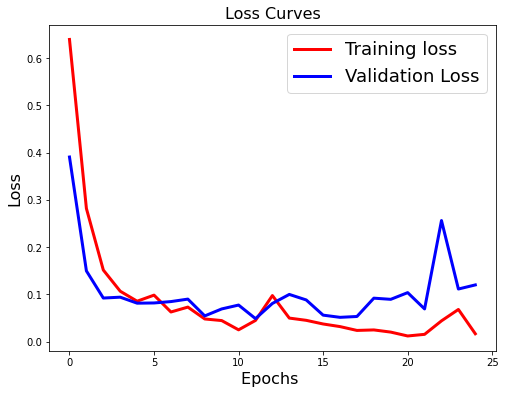

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = [8,6])
plt.plot(history.history['loss'], 'r', linewidth = 3.0)
plt.plot(history.history['val_loss'],'b', linewidth = 3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize = 18)
plt.xlabel('Epochs ', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.title('Loss Curves', fontsize = 16)

### Accuracy Curves

Text(0.5, 1.0, 'Accuracy Curves')

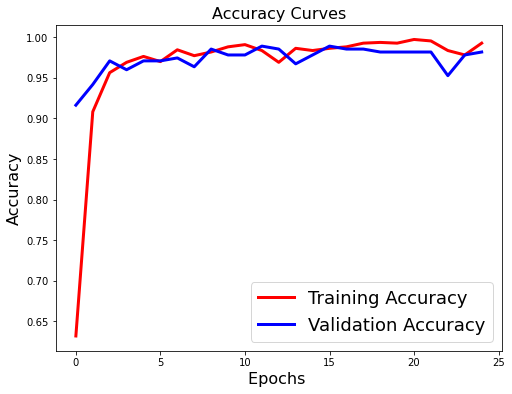

In [20]:
plt.figure(figsize = [8,6])
plt.plot(history.history['accuracy'], 'r', linewidth = 3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth = 3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)
plt.xlabel('Epochs ', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Accuracy Curves', fontsize = 16)

## Predicting the result of inputted image using the designed model

In [21]:
from PIL import Image
import cv2 
from IPython.display import display
import numpy as np

from tensorflow.keras.preprocessing import image

## Image 1

### Reading the image

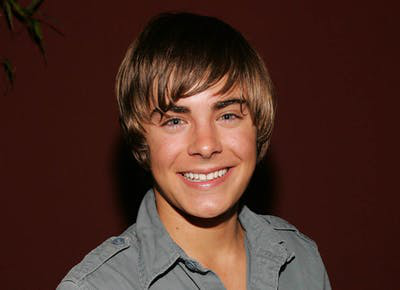

In [22]:
img = cv2.imread('without_mask.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img))

## Final Result

In [23]:
tested_image = image.load_img('without_mask.jpg',target_size = (64,64))
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = model.predict(tested_image)
train_dataset.class_indices

if output[0][0] == 1:
    prediction = 'Mask not worn. Please wear mask.'
    print(prediction)
else:
    prediction = 'Mask worn. Have a good day!'
    print(prediction)

Mask not worn. Please wear mask.


## Predicted Result : No mask

## Image 2

### Reading the image

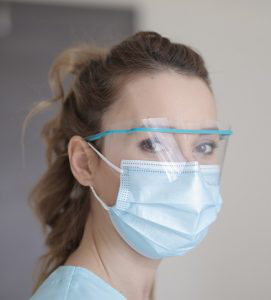

In [24]:
img = cv2.imread('with_mask.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img))

## Final Result

In [25]:
tested_image = image.load_img('with_mask.jpg',target_size = (64,64))
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = model.predict(tested_image)
train_dataset.class_indices

if output[0][0] == 1:
    prediction = 'Mask not worn. Please wear mask.'
    print(prediction)
else:
    prediction = 'Mask worn. Have a good day!'
    print(prediction)

Mask worn. Have a good day!


## Predicted Result : Mask worn

# All the predicted results are correct and model test accuracy = 98.18%.

# Thank you!